# EDA on Employee data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read file
df = pd.read_csv('employees.csv')
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
# see the size of data set
df.shape

(1000, 8)

In [5]:
# see type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
# see the summary of numbers
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [7]:
# finding null values

In [8]:
# gives the number of nulls in each column
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [9]:
# gives the total number of notnull items in a column
df.notnull().sum()

First Name            933
Gender                855
Start Date           1000
Last Login Time      1000
Salary               1000
Bonus %              1000
Senior Management     933
Team                  957
dtype: int64

In [10]:
# gender has more na values so we can replace this with no gender


In [11]:
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [12]:
# fill gender nan with no gender
df['Gender'].fillna('No Gender', inplace=True)

In [13]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [14]:
# value_counts gives number frequency of each coloumn
df['Senior Management'].value_counts()



True     468
False    465
Name: Senior Management, dtype: int64

In [15]:
# gender is ok. Now we can fill senior management with mode

# this will give a series. but we need that value only for that we use values[0]
mode = df['Senior Management'].mode().values[0]
df['Senior Management'].fillna(mode,inplace=True)
mode

True

In [16]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [17]:
df['Senior Management'].value_counts()

True     535
False    465
Name: Senior Management, dtype: int64

In [18]:
# we dont replace first name with any valure. so simpley drop
df = df.dropna(how='any',axis=0)

In [19]:
df.isnull().sum()
# Now free of missing data

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [20]:
# Visualization

<AxesSubplot:xlabel='Salary', ylabel='Count'>

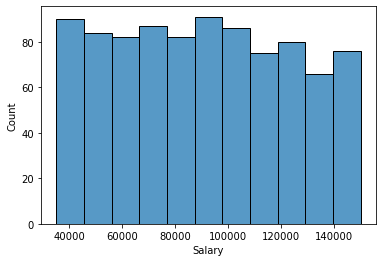

In [21]:
sns.histplot(x='Salary', data=df)

<AxesSubplot:xlabel='Team', ylabel='Salary'>

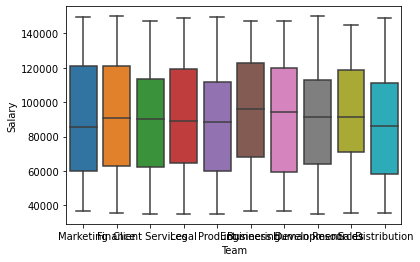

In [22]:
sns.boxplot(x='Team', y = 'Salary', data=df,)

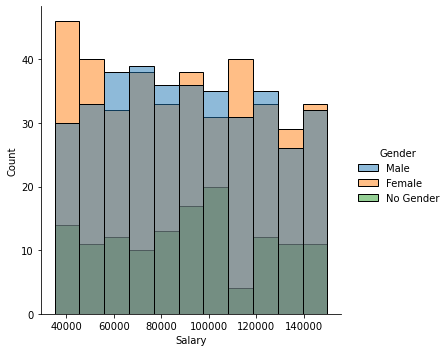

In [23]:
sns.displot(x='Salary',data= df, hue='Gender')

In [24]:
df.Gender.value_counts()

Female       393
Male         371
No Gender    135
Name: Gender, dtype: int64

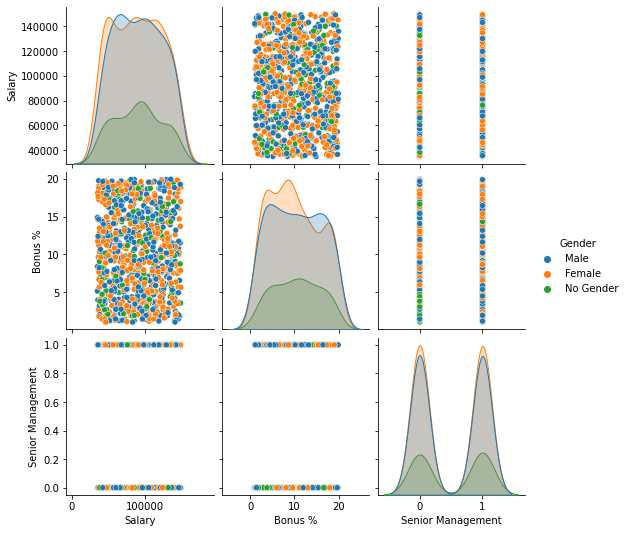

In [25]:
# all availabe bivariate plot,(diagonal is hist)
sns.pairplot(df,hue='Gender')

<AxesSubplot:xlabel='Salary', ylabel='Bonus %'>

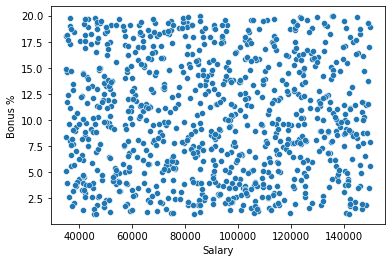

In [26]:
sns.scatterplot(x='Salary',y='Bonus %',data=df)

In [27]:
df.Team.value_counts()

Client Services         100
Business Development     99
Finance                  97
Product                  92
Marketing                91
Legal                    86
Engineering              86
Sales                    86
Human Resources          85
Distribution             77
Name: Team, dtype: int64

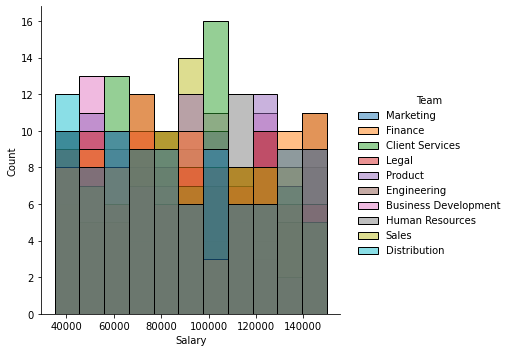

In [28]:
sns.displot(x='Salary', hue='Team',
             data=df)

<AxesSubplot:xlabel='Salary', ylabel='Team'>

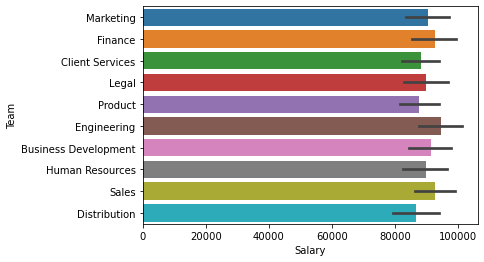

In [29]:
sns.barplot(x='Salary', y = 'Team',data=df)

In [30]:
df.corr()

,Salary,Bonus %,Senior Management
Salary,1.000000,-0.017020,0.019302
Bonus %,-0.017020,1.000000,-0.051122
Senior Management,0.019302,-0.051122,1.000000


In [31]:
df.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [32]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


In [33]:
# type casting to str
df['Start Date']= df['Start Date'].astype(str)  d
#replacing / with -
df['Start Date'] = df['Start Date'].str.replace('/','-')

SyntaxError: invalid syntax (4186083432.py, line 2)

In [ ]:
# change to date format
df['Start Date'] = pd.to_datetime(df['Start Date'],dayfirst=True)

In [ ]:
df.info()

In [ ]:
df['Start Date'].max()

In [ ]:
df['Experience'] = (df['Start Date'].max()) - df['Start Date']
# calculate experience in year 
df['service' ] = 2016 - (df['Start Date'].dt.year)

In [ ]:
df

In [ ]:
sns.scatterplot(x='service',y='Salary', data =df,hue='Gender')

In [ ]:
sns.scatterplot

In [45]:
def isPalindrome(x: int) -> bool:
        print( str(x)==str(x)[::-1])
isPalindrome(121)

True


In [60]:
# finding mode using statistics module
import numpy as np
arr = np.array([1,2,3,3,4,4])
import statistics
statistics.mode(arr)

3